In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
housing_df=pd.read_csv('./Dataset/housing.csv')

In [3]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**median_house_value** is the target variable

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**ocean_proximity** is the only categorical feature in the housing dataset with five distinct categorical values.

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Handling Missing Values**

In [7]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

-> Only **total_bedrooms** feature has missing values whose count is 207.

In [8]:
na_housing_df=housing_df[housing_df['total_bedrooms'].isna()]

<Axes: xlabel='longitude', ylabel='latitude'>

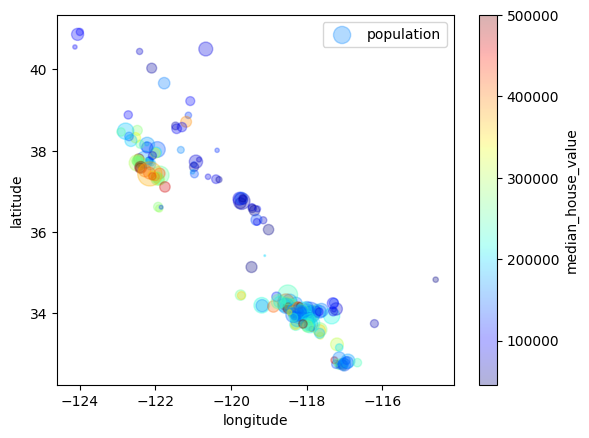

In [9]:
na_housing_df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.3,s=na_housing_df["population"]/25, label="population",c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)

In [10]:
na_housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: count, dtype: int64

In [11]:
207/20640 * 100

1.002906976744186

In [12]:
housing_df.dropna(inplace=True)

As missing values are only one percent of the total samples and there is no specific pattern followed by missing values, we will drop such records.

### **Handling outliers**

In [13]:
numerical_columns = housing_df.select_dtypes(include=['float64', 'int64']).columns

Q1 = housing_df[numerical_columns].quantile(0.25)
Q3 = housing_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((housing_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (housing_df[numerical_columns] > (Q3 + 1.5 * IQR)))

In [14]:
outliers.sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
dtype: int64

### **Visualizing data distribution**

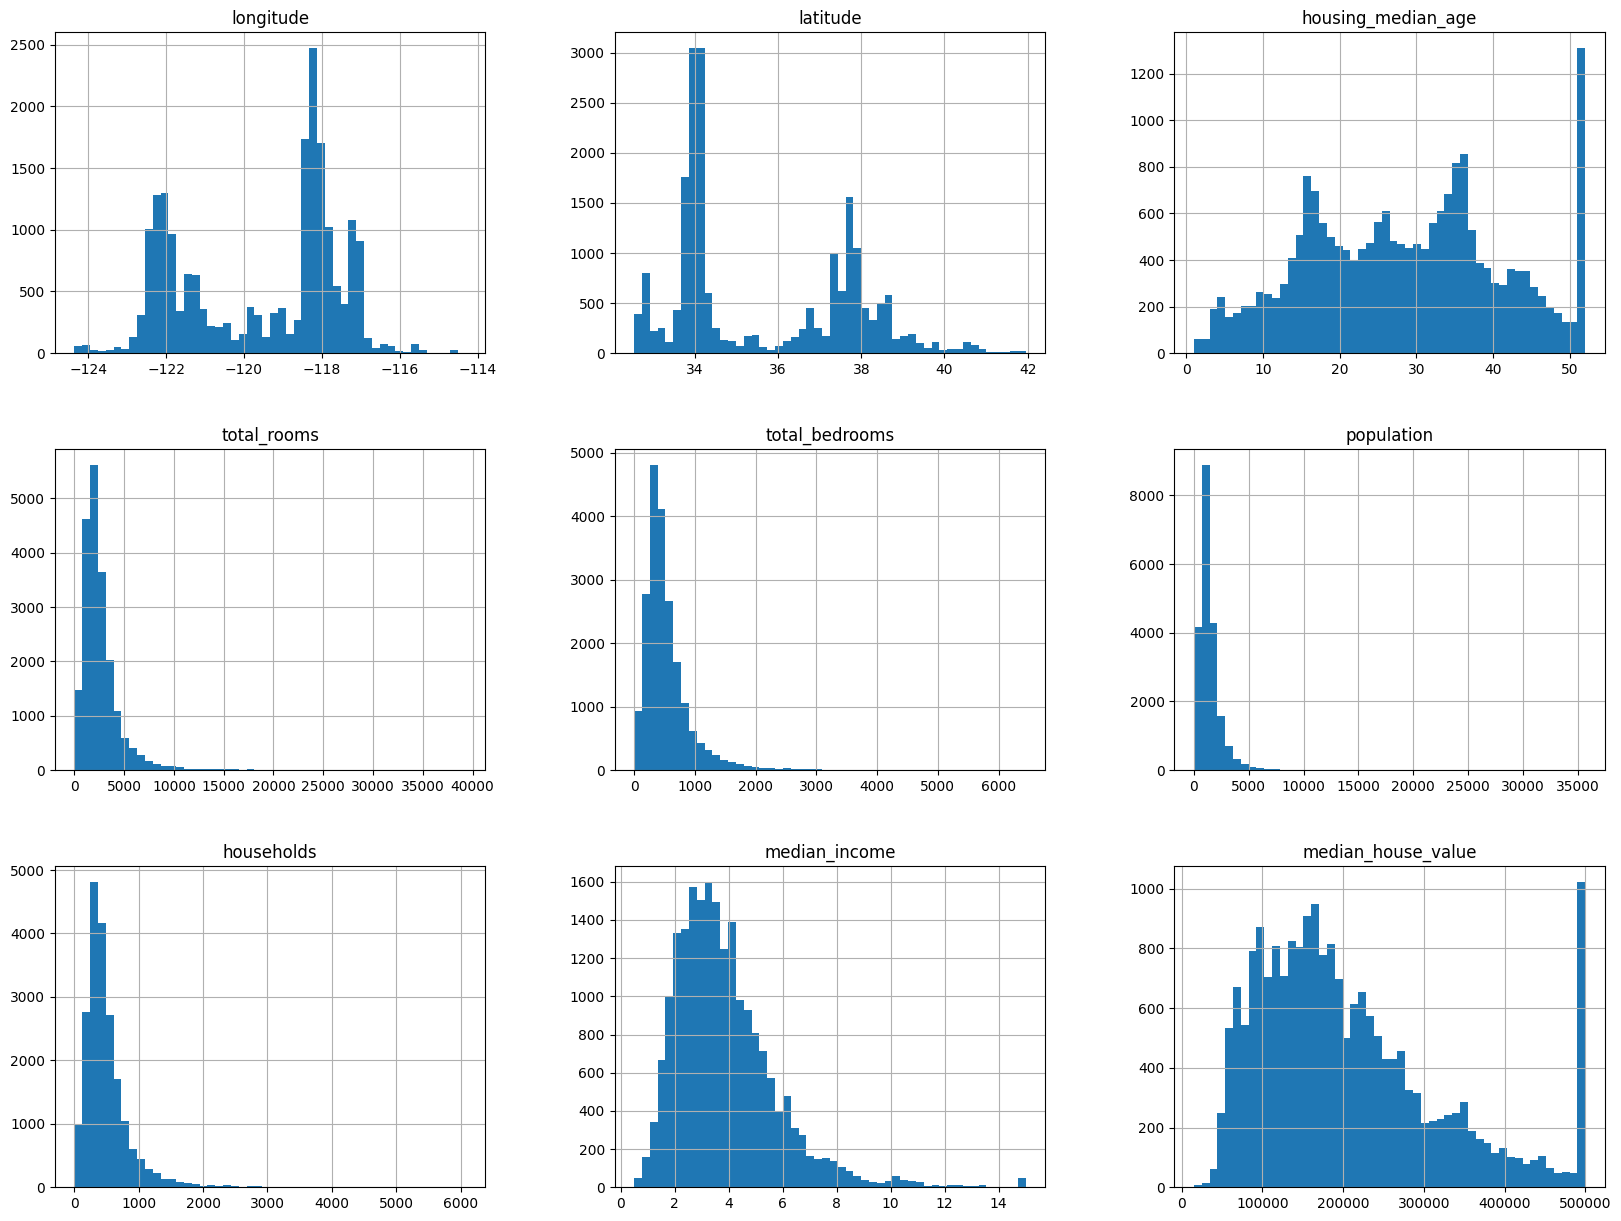

In [15]:
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

### **Visualizing the cleaned data**

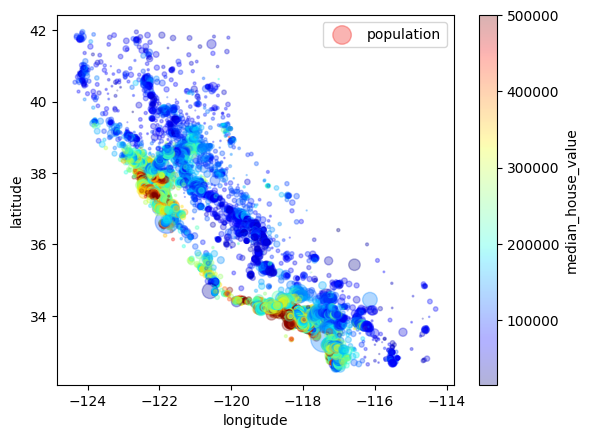

In [16]:
housing_df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.3,s=housing_df["population"]/100, label="population",c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

### **Looking for Correlations**

In [17]:
corr_matrix=pd.DataFrame(housing_df[numerical_columns].corr())

In [18]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

#### Now we will look for collinearity between features

In [20]:
vif_matrix=1/(1-corr_matrix**2)

In [21]:
vif_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,inf,6.892509,1.012104,1.002073,1.004869,1.010156,1.003204,1.000242,1.002065
latitude,6.892509,inf,1.000142,1.001346,1.004507,1.012023,1.005178,1.006381,1.021367
housing_median_age,1.012104,1.000142,inf,1.149495,1.114441,1.095879,1.100920,1.014188,1.011458
total_rooms,1.002073,1.001346,1.149495,inf,7.440810,3.772605,6.432748,1.040753,1.018089
total_bedrooms,1.004869,1.004507,1.114441,7.440810,inf,4.356147,24.917451,1.000060,1.002475
population,1.010156,1.012023,1.095879,3.772605,4.356147,inf,5.649279,1.000026,1.000640
households,1.003204,1.005178,1.100920,6.432748,24.917451,5.649279,inf,1.000181,1.004229
median_income,1.000242,1.006381,1.014188,1.040753,1.000060,1.000026,1.000181,inf,1.900538
median_house_value,1.002065,1.021367,1.011458,1.018089,1.002475,1.000640,1.004229,1.900538,inf


#### Features with VIF value greater than 5 are highly collinear.
Here's pair of collinear features:
* longitude, latitude
* total_rooms, total_bedrooms
* total_rooms, households
* total_bedrooms, households
* population, households

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

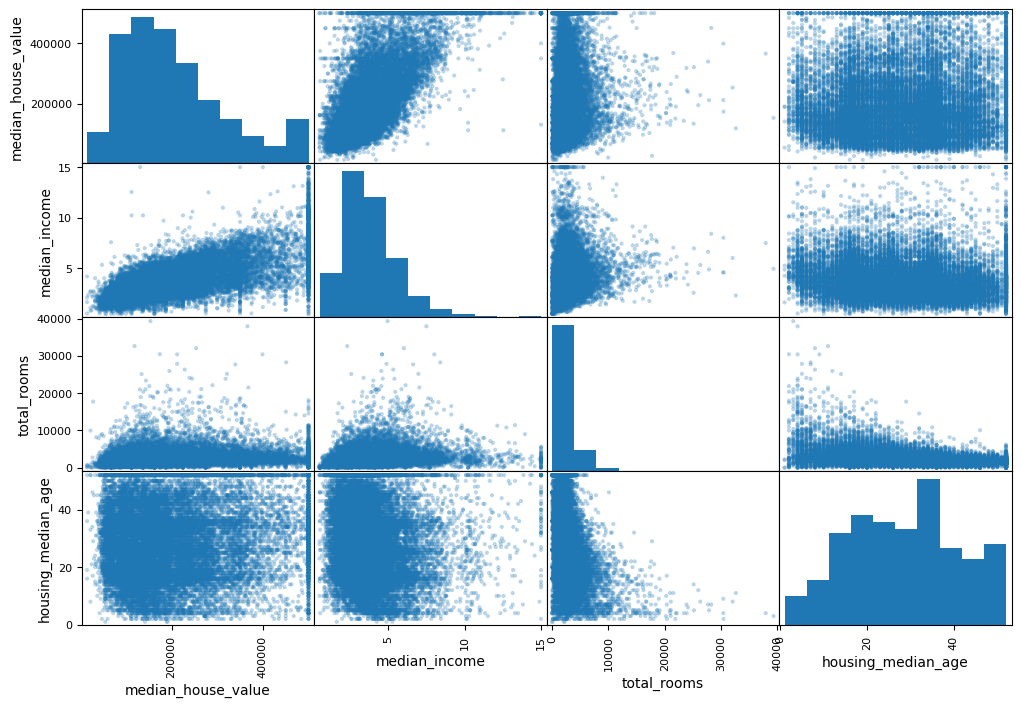

In [22]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(housing_df[attributes], figsize=(12, 8),alpha=0.3)